<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The t-distribution and t-tests
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [28]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Population:
- Mean $\mu$
- Standard deviation $\sigma$

Provide $N$ is large enough: 
 
- CLT give us ability to make some statements about sampling from population:


- Distribution of $\bar{X}$ of samples of size N: 
- Normal distribution with mean $\mu$ and std $\frac{\sigma}{\sqrt{N}}$

Or in terms of rescaled variables:
$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} $$

follows the standardized normal distribution $N(0,1)$.

#### Often faced with a situation where

- $\mu$ is unkown: something to be estimated by sampling 
- $\sigma$ is unknown.

But as long as $N$ of sample used for mean estimation is large enough:

$$ Z = \frac{(\bar{X} - \mu)}{\sigma/\sqrt{N}} \approx \frac{(\bar{X} - \mu)}{s/\sqrt{N}}  $$ 

where $s^2$ is our sample variance:

$$ s^2 = \sum_{i=1}^{N}\frac{(X_i - \bar{X})^2}{N-1} $$


- And then apply CLT and use $Z$ for:
    - Confidence interval estimation
    - Hypothesis testing

#### But when N is small...

This doesn't really work. Why?

Sample-to-sample fluctuations in $s$ appreciable:
- Let's see this for samples of various sizes drawn from the standard normal.

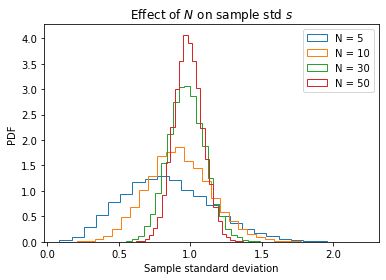

In [29]:
from scipy.stats import norm

N_list = [5,10, 30,50]
for N in N_list:
    s_list = [norm.rvs(loc = 0, scale = 1, size = N).std() for trial in range(10000)]
    plt.hist(s_list, bins = 25, density = True, histtype = 'step', label = "N = " + str(N))

plt.legend()
plt.xlabel('Sample standard deviation')
plt.ylabel('PDF')
plt.title('Effect of $N$ on sample std $s$')
plt.show()

The sample standard deviation fluctuation amplifies for smaller sample size $N < 30$

$$ \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$

- $\bar{X}$ is random variable.
- $s$ must be treated as random variable.


$$t = \frac{(\bar{X} - \mu)}{s/\sqrt{N}} $$


- **CLT cannot be invoked to see how t distributed**
    - $t$ statistic is a composite random variable. 
    - N is small

If **population** normally distributed (or have good reason to believe this):

- t follows another distribution: **the standardized t-distribution**.
- correction to normal because:
    - $\sigma$ uncertain.
    - $s$ for a given sample fluctuates a lot about unknown $\sigma$

Import t distribution in scipy:
- Assumes underlying population distribution samples is normal. 
- Sampling distribution of **means** of sample size N w/ unknown population std

In [30]:
from scipy.stats import t

- pdf needs degree of freedom argument (df):
    - loc = 0, scale = 1 (standardized) default
    - $df = N - 1$ for t-distribution.

In [31]:

# define t pdf for a few degrees of freedom and normal
x = np.linspace(-4,4,400)
t_distribution5 = t.pdf(x, loc = 0, df = 4) # N = 5
t_distribution10 = t.pdf(x, loc = 0, df = 9) # N = 10 
t_distribution20 = t.pdf(x, loc = 0, df = 19) # N = 20
norm_distribution = norm.pdf(x, loc = 0, scale = 1)

In [32]:
%%capture tdistplot

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,t_distribution5, label = 't-distribution: df = 4' )
ax.plot(x,t_distribution10, label = 't-distribution: df = 9' )
ax.plot(x,t_distribution20, label = 't-distribution: df = 19' )
ax.plot(x,norm_distribution, label = 'normal')
ax.set_xlabel('t',  fontsize = 16)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_title('t-distribution PDF approach to normal', fontsize = 18)
ax.legend()
plt.show()

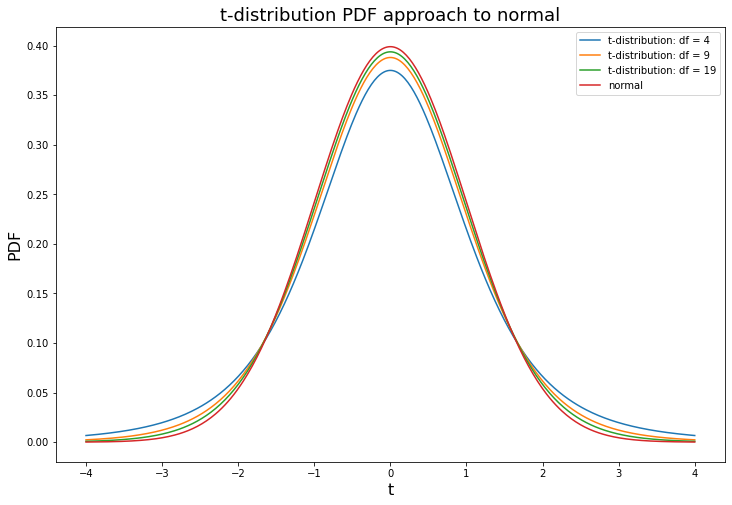

In [33]:
tdistplot()

Looks similar to normal: but tails are fatter.
- But area under tails:
    
    - central to hypothesis testing!
    - critical for acceptance/rejection region
        

#### Hypothesis testing means with t-tests

#### Same story as Z-test, different distribution/critical values.

 **$t$-test**:
 
 - Calculate the **$t$-statistic** using the sample's standard deviation $s$:
 $$\large t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 - We calculate the p-value from the **$t$-distribution**

 **Scenario**

 - African savannah elephants: weights distributed normally around a mean of $9000$ lbs. 
 - Wildlife Conservation Society of Gabon: measured weights of $20$ African elephants in Gabon  

 Claim: Gabonese elephants are significantly different from general African population.



$H_0$: _There is no difference between the weight of Gabonese elephants and the general African elephant population_

$H_1$: _There is a difference between the weight of the Gabonese elephants and the general African elephant population_

Let's define our $\alpha$ to be $0.05$

#### What type of tailed test?

Two tailed.

#### Our Gabonese elephant weight sample

Because the sample size is small, we need to use a one sample $t$-test. 

In [34]:
# We're given these values from the sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

In [35]:
print(f'Sample mean: {gab.mean():.1f}')
print(f'Sample std: {gab.std(ddof=1):.1f}')

Sample mean: 8562.0
Sample std: 296.2


Now $\alpha$ = 0.05. Two tailed test.

Calculate t-statistic

In [36]:
N = len(gab)
s_n = gab.std(ddof=1)/np.sqrt(N)
t_stat = (gab.mean() - 9000)/s_n

t_stat

-6.614120615780003

Calculate the p-value.

In [37]:
t_abs = np.abs(t_stat)
# need to specify degrees of freedom for cdf. assumes standardized t.
p_value = t.cdf(-t_abs, df = N - 1) + t.sf(t_abs, df = N - 1)
p_value

2.4982149013801283e-06

Reject the null at $\alpha = 0.05$.

May also want to calculate the critical t-value for two-tailed test:

$|t| > t_{crit}$ reject the null.

In [11]:
def plot_two_tailed_t(alpha, N):
    x_scaled = np.linspace(-5,5,400)
    Y_scaled = t.pdf(x_scaled, df = N-1)


    t_crit = t.ppf(1- (alpha/2), df = N-1)

    fig, ax = plt.subplots(figsize = (8,5))

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(-t_crit, c = 'b')
    ax.axvline(t_crit, c = 'b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > t_crit), alpha = 0.5, color='b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < -t_crit ), alpha = 0.5, color='b')

    ax.annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (t_crit + .25,.1), xy = (t_crit + 0.25,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
    ax.annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (-t_crit - 2,.1), xy = (-t_crit - .75,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )

    ax.annotate(r'$-t_{crit}$', xy = (-t_crit-1.5,.3), fontsize=16, c ='b' )
    ax.annotate(r'$t_{crit}$', xy = (t_crit+0.25,.3), fontsize=16, c ='b' )
    
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Two-Tailed Test: t-distribution')
    

In [12]:
def plot_left_tailed_t(alpha, N):
    x_scaled = np.linspace(-5,5,400)
    Y_scaled = t.pdf(x_scaled, df = N-1)

    t_crit = t.ppf(1- alpha, df = N-1)

    fig, ax = plt.subplots(figsize = (8,5))

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(-t_crit, c = 'b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < -t_crit ), alpha = 0.5, color='b')

    ax.annotate(r'$\alpha$ = 0.05', xytext = (-t_crit - 2,.1), xy = (-t_crit - .75,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )

    ax.annotate(r'$-t_{crit}$', xy = (-t_crit-1.5,.3), fontsize=16, c ='b' )
    
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Left-Tailed Test: t-distribution')

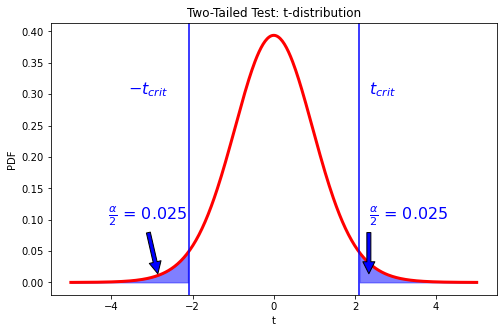

In [13]:
plot_two_tailed_t(alpha = 0.05, N = N)

The .ppf function: percentile point function:
- Know probability. Want to get $t^*$
- satisfying CDF $P(t<t^*) =  \frac{\alpha}{2}$

In [39]:
# needs to specify df as usual:
t.ppf(alpha/2, df = N-1)

-2.0930240544082634

This is $-t_{crit}$.

#### The easy way

In [15]:
# if this throws an error you need to upgrade your scipy version
result = stats.ttest_1samp(gab, 9000, alternative = 'two-sided')
t_stat, p_value = result
result

Ttest_1sampResult(statistic=-6.614120615780001, pvalue=2.498214901380137e-06)

#### Left-tailed test

Suspect that Gabonese elephant weight less than general population.
- $H_0$: $\mu_{Gabo} = \mu_0$
- $H_a$: $\mu_{Gabo} < \mu_0$

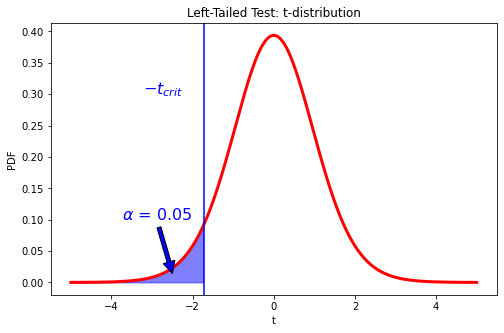

In [16]:
plot_left_tailed_t(alpha = 0.05, N = N)

In [40]:
alpha = 0.05
t_crit = t.ppf(alpha, df = N - 1)
t_crit

-1.7291328115213678

And conduct the one sample left-tailed t-test:

In [41]:
# if this throws an error you need to upgrade your scipy version
result = stats.ttest_1samp(gab, 9000, alternative = 'less')
t_stat, p_value = result
result

Ttest_1sampResult(statistic=-6.614120615780001, pvalue=1.2491074506900686e-06)

Hypothesis testing on physical characteristics and genetic testing:


<img src = "Images/elephants.jpg" align = "center" width = 600 />
<center>Forest vs. Savannah Elephant

#### Confidence Intervals: t-distribution

- Again, same idea as with Z-distribution
- Have sample: estimate population mean.
- Uncertainty in population mean

But $ N < 30$

Confidence interval at confidence level $c$:
- Measure $\bar{X_0}$
- assuming underlying population is normally distributed

$$\bar{X_0} \pm t^* \frac{s}{\sqrt{N}} $$


- $c$ fraction of means lie in range $\pm t^*$ range in standardized t-distribution.


In [19]:

def plot_confidence_interval_t(c, N):
    
    x_scaled = np.linspace(-5,5,800)
    Y_scaled = t.pdf(x_scaled, df = N-1)

    fig,ax = plt.subplots()
    
    t_crit = t.ppf( 1 - (1 - c)/2, df = N - 1)

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(-t_crit, c = 'b')
    ax.axvline(t_crit, c = 'b')

    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > -t_crit )& (x_scaled < t_crit), alpha = 0.5, color='r')


    ax.annotate('c = 0.95', xytext = (-5.0,.25), xy = (-.5,.20), fontsize=16, arrowprops=dict(facecolor='r', shrink=0.05), c ='r' )
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Confidence Interval: standardized t')
    plt.show()


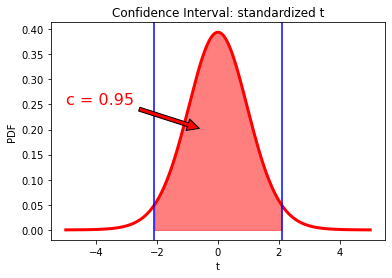

In [42]:
plot_confidence_interval_t(0.95, N)

Compute (-$t^*$, $t^*$):
    

In [43]:
# 95% confidence interval
c = 0.95

In [22]:
# outputs (-t*, +t*)
CI_norm = t.interval(c, df = N - 1)
CI_norm

(-2.093024054408263, 2.093024054408263)

- sample mean $\bar{X_0}$ is our central estimate of population mean
- conduct rescaling to give us the confidence interval:
    
    As $$ t = \frac{\bar{X} - \bar{X_0}}{s/\sqrt{N}} $$
   

In [44]:
# Remember our Galbonese elephant data
s = gab.std(ddof = 1)
s

296.1535874650534

In [45]:
N = len(gab)
N

20

In [46]:
Xbar0 = gab.mean()
Xbar0

8562.0

To get our unscaled CI is easy now:
- multiply numpy array of lower/upper $t^*$ values
- by $s/\sqrt{N}$
- add sample mean $\bar{X}_0$

In [47]:
np.array(CI_norm)

array([-2.09302405,  2.09302405])

In [48]:
Xbar0 + np.array(CI_norm)*(s/np.sqrt(N))

array([8423.39585455, 8700.60414545])

Next up:

- Statistical tests with more than one sample.